# Analysis of Stack Overflow Annual Developer Surveys

###  OBJECTIVE : 

Every year Stack Overflow conducts developers Survey, which is the largest and most comprehensive survey of people who code around the world. This survey covers everything from developer's favorite technologies to their job preferences. From these surveys Stack Overflow has been trying to figure out interesting facts and reflections of the worldwide developer community. 

In this project I am going to analyze previous years surveys and I will try to get some useful trends, which I can use for planning my long dream of working in the developer industry. There are students and working professionals like me who are interested in Data science, ML, developing and programming jobs, so I want to analyze these surveys to know about the history and trends in the developers community. Particularly I would like to know about following 3 things:

**TOP PROGRAMMING LANGUAGES**

1. Which programming languages had most demand in 2018 & 2019 
2. A trend of programming languages from 2016 to 2019
3. Popular programming languages amongst students and developers in 2019

**TOP DEVELOPER ROLES**
1. Top 3 developer roles in 2018 and 2019
2. Gender Proportion in Top 3 Developer Types (Year 2019)
3. Popular Languages In Top 3 Developer Types in 2019)

**GENDER**
1. Gender proportion in development community from 2016 to 2019

## INDEX


- <a href='#1'>1. LOAD THE LIBRARIES AND READ THE DATA</a>  

    - <a href='#1.1'>1.1. LOAD LIBRARIES</a> 
    - <a href='#1.2'>1.2. READ THE DATA</a> 
    
    
- <a href='#2'>2. OVERVIEW </a> 

    - <a href='#2.1'>2.1. DATA INFORMATION </a> 
    - <a href='#2.2'>2.2. HEAD</a>
    - <a href='#2.3'>2.3. DATA TYPES</a>
    
- <a href='#3'>3. MISSING VALUES </a>

    - <a href='#3.1'>3.1. CORRELATION WITH TARGET VARIABLE </a>
 
    
- <a href='#4'> 4. ANALYSIS </a>
   - <a href='#4.1'> 4.1. TOP PROGRAMMING LANGUAGES: </a>
   - <a href='#4.2'> 4.2. TOP DEVELOPER ROLES: </a>
   - <a href='#4.3'> 4.3. GENDER: </a>
   
- <a href='#4'> 5. CONCLUSION </a>
  

## <a id='1'>1. LOAD LIBRARIES AND READ THE DATA </a> 

**TOP PROGRAMMING LANGUAGES**

- A trend of programming languages from 2016 to 2019
- Top percentage-wise programming languages in 2016, 2017, 2018 and 2019
- Comparison of programming languages in 2018 and 2019
- Gender-wise programming languages in 2019
- Popular programming languages amongst students and developers in 2019

**TOP DEVELOPER ROLES**
- Top 3 developer roles in 2018 and 2019
- Popular programming languages in different  developer  types 
- Gender proportion in different  developer  types

**GENDER**
- Gender proportion in development community from 2016 to 2019


I will be using following python packages for this analysis: 

In [515]:
#Import initial libraries
import numpy as np
import pandas as pd

# Libraries for plotting
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots


#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 
style_dict = {'background-color':'lightyellow','color':'#000000','border-color': 'red','font-family':'Roboto'}

### <a id = '1.2'> 1.2. READ THE DATA </a> 

Data Source : [Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey)

In [516]:
survey_2011 = pd.read_csv("survey_results_public_2011.csv",sep = ",",engine='python')
survey_2011.head(2).style.set_properties(**style_dict)

In [517]:
survey_2012 = pd.read_csv("survey_results_public_2012.csv",sep = ",",engine='python')
survey_2012.head(2).style.set_properties(**style_dict)

In [518]:
survey_2013 = pd.read_csv("survey_results_public_2013.csv",sep = ",",engine='python')
survey_2013.head(2).style.set_properties(**style_dict)

In [519]:
survey_2014 = pd.read_csv("survey_results_public_2014.csv",sep = ",",engine='python')
survey_2014.head(2).style.set_properties(**style_dict)

In [520]:
survey_2015 = pd.read_csv("survey_results_public_2015.csv",sep = ",",engine='python')
new_header_2015 = survey_2015.iloc[0] #grab the first row for the header
survey_2015 = survey_2015[1:] #take the data less the header row
survey_2015.columns = new_header_2015 #set the header row as the df header
survey_2015.head(2).style.set_properties(**style_dict)

In [521]:
#Load the  datasets from 2016 to 2019 :
survey_2016 = pd.read_csv("survey_results_public_2016.csv",sep = ",")
survey_2017 = pd.read_csv("survey_results_public_2017.csv",sep = ",")
survey_2018 = pd.read_csv("survey_results_public_2018.csv",sep = ",")
survey_2019 = pd.read_csv("survey_results_public_2019.csv",sep = ",")

### Observations: 
-  I wanted to do the comparative analysis of surveys from 2011 to 2019, but due to the data inconsistency in surveys from 2011 to 2015, am going with 4 years data from 2016 to 2019. Also, in some sections  of this analysis I have used data only of year 2019. 
- You can see above cells to see few lines of surveys from 2011 to 2015 .
- To use the data from 2011 to 2015 one will have to arrange the data properly and it will take good amount of time, that is why I am just going with data from 2016 to 2019.

## <a id = '2'> 2. OVERVIEW </a>

### <a  id='2.1'> 2.1. DATA INFORMATION<a/>

In [659]:
# Data columns in the dataset:
survey_2019.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

### <a id = '2.2' > 2.2. HEAD <a/>

#####  Let's see first few lines of the survey

In [660]:
# First two rows of the dataset:
survey_2019.head(2).style.set_properties(**style_dict)

### <a id = '2.3' > 2.3. DATA TYPES <a/>

In [676]:
len(survey_2019.dtypes.unique())

3

In [678]:
pd.value_counts(survey_2019.dtypes)

object     79
float64     5
int64       1
dtype: int64

We have 79 object columns. We can use change them to numerical by using various techniques in python. 

## <a id = '3'> 3. MISSING VALUES  <a/>

In [668]:
#Number of missing columns in 2016
most_missing_cols = set(survey_2016.columns[survey_2016.isnull().mean() > 0.30])
print("There is/are {} columns with more than 30% missing values in 2016 survey.".format(len(most_missing_cols)))

#Number of missing columns in 2017
most_missing_cols = set(survey_2017.columns[survey_2017.isnull().mean() > 0.30])
print("There are {} columns with more than 30% missing values in 2017 survey.".format(len(most_missing_cols)))


#Number of missing columns in 2018
most_missing_cols = set(survey_2018.columns[survey_2018.isnull().mean() > 0.30])
print("There are {} columns with more than 30% missing values in 2018 survey.".format(len(most_missing_cols)))

#Number of missing columns in 2019
most_missing_cols = set(survey_2019.columns[survey_2019.isnull().mean() > 0.30])
print("There are {} columns with more than 30% missing values in 2019 survey.".format(len(most_missing_cols)))

There is/are 1 columns with more than 30% missing values in 2016 survey.
There are 130 columns with more than 30% missing values in 2017 survey.
There are 82 columns with more than 30% missing values in 2018 survey.
There are 11 columns with more than 30% missing values in 2019 survey.


## <a id='4'>4. ANALYSIS </a> 

**OBJECTIVE OF ANALYSIS**

**4.1. TOP PROGRAMMING LANGUAGES**

1. Which programming languages had most demand in 2018 & 2019 
2. A trend of programming languages from 2016 to 2019
3. Popular programming languages amongst students and developers in 2019

**4.2. TOP DEVELOPER ROLES**
1. Top 3 developer roles in 2018 and 2019
2. Gender Proportion in Top 3 Developer Types (Year 2019)
3. Popular Languages In Top 3 Developer Types in 2019)

**4.3. GENDER**
1. Gender proportion in development community from 2016 to 2019


# <a id='4.1'>4.1. TOP PROGRAMMING LANGUAGES  </a> 

As an aspiring developer, one wants to know about the current demanding and valued programming languages in the industry. From the below analysis we will try to get the useful trends and insights of programming languages. 

**Year-wise Languages dataset**

In [ ]:
# Save year-wise languages data: 
survey_2016_langs = pd.DataFrame(survey_2016.tech_do).dropna()
survey_2017_langs = pd.DataFrame(survey_2017.HaveWorkedLanguage).dropna()
survey_2018_langs = pd.DataFrame(survey_2018.LanguageWorkedWith).dropna()
survey_2019_langs = pd.DataFrame(survey_2019.LanguageWorkedWith).dropna()

## 1. Which programming languages had most demand in 2018 & 2019

**A function to clean a programming languages column in surveys and to get a data frame with top languages count 
and their percentages**

In [687]:
## A function to clean a programming languages column in surveys and to get a data frame with top languages count 
## and their percentages**
def all_languages(dataset,column,new_name_col1,year):
    
    temp = pd.DataFrame(dataset[column].dropna())
    temp = pd.DataFrame(temp[column].apply(lambda x: pd.value_counts(x.split(";")))
                             .sum(axis = 0)).reset_index()
    new_name_col2 = ("Count"+str(year))
    
    '''
    dataset = dataset you want to use 
    col = On the column you want to use this function
    name_col1 = give new name to column one
    name_col2 = give new name to column two (Preferably count)
    '''
    #Renaming columns
    clean_data = temp.rename(columns={"index": new_name_col1,0:new_name_col2})
    clean_data["New_column"] = clean_data[new_name_col1].str.strip()
    clean_data = clean_data.drop(columns=[new_name_col1])
    clean_data = clean_data.sort_values(by=new_name_col2, ascending=False)

    
    #Grab DataFrame rows where column has certain values
    selected_rows = pd.DataFrame(clean_data.groupby(['New_column']).sum().sort_values(by=new_name_col2,
                                                        ascending = False)).reset_index()
    selected_rows['year'+str(year)] = year
    selected_rows["Count%"+str(year)] = round((selected_rows[new_name_col2]/sum(selected_rows[new_name_col2]))*100,3)
 
    return selected_rows

In [685]:
# Use above function to get the dataframes which have percentages for SQL, JavaScript, Java, Python, C#, C++, HTML/CSS 
lang_2018 = all_languages(survey_2018_langs,"LanguageWorkedWith","Language",2018)
lang_2018 = lang_2018.replace({"HTML":"HTML/CSS"})

lang_2019 = all_languages(survey_2019_langs,"LanguageWorkedWith","Language",2019)
lang_2018_2019 = pd.merge(lang_2019[["New_column","Count%2019"]],lang_2018[["New_column","Count%2018"]],
                on="New_column", how='left')
lang_2018_2019 = lang_2018_2019.dropna(subset=["Count%2019","Count%2018"]).rename(columns={"New_column": "languages"})
lang_2018_2019

languages  Count%2019  Count%2018
0    JavaScript      13.443      11.260
1      HTML/CSS      12.591      11.042
2           SQL      10.793       9.198
3        Python       8.273       6.251
4          Java       8.154       7.314
6            C#       6.151       5.550
7           PHP       5.228       4.956
8           C++       4.659       4.092
9    TypeScript       4.205       2.806
10            C       4.090       3.715
12         Ruby       1.664       1.629
13           Go       1.635       1.139
14     Assembly       1.324       1.186
15        Swift       1.304       1.299
16       Kotlin       1.276       0.722
17            R       1.146       0.991
18          VBA       1.085       0.784
19  Objective-C       0.951       1.135
20        Scala       0.751       0.704
21         Rust       0.634       0.382
24      Clojure       0.285       0.212
26           F#       0.221       0.230
27       Erlang       0.176       0.182

In [726]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y= lang_2018_2019.languages,
    x=lang_2018_2019["Count%2018"],
    name='Year 2018',
    orientation='h',text=lang_2018_2019["Count%2018"], textposition = 'auto',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=2)
    )
))
fig.add_trace(go.Bar(
    y=lang_2018_2019.languages,
    x=lang_2018_2019["Count%2019"],
    name='Year 2019',
    orientation='h',text=(lang_2018_2019["Count%2019"]) , textposition = 'auto',
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=2)
    )
))

# Update layout properties
fig.update_layout(
    title_text="Top programming languages in 2018 and 2019",
    width=700,
    height = 1000
)
fig.update_layout(barmode='stack')
fig.layout.yaxis.tickformat = ',.0%' 
fig.update_layout(yaxis_categoryorder = 'total ascending')


fig.show()

**Conclusion:** 

- As per above chart, JavaScript was the top most language used by the developers in 2018 and 2019 followed by HTML/CSS, SQL, Java and Python.


## 2. A trend of programming languages from 2016 to 2019

In [688]:
''' A function to clean a programming languages column in surveys and to get a data frame with top languages count 
and their percentages '''
def languages(dataset,column,new_name_col1,year):
    
    temp = pd.DataFrame(dataset[column].dropna()) #Drop missing values 
    
    # Spliting the string separated by ; and count them:
    temp = pd.DataFrame(temp[column].apply(lambda x: pd.value_counts(x.split(";")))
                             .sum(axis = 0)).reset_index()
    new_name_col2 = ("Count"+str(year))
    
    '''
    dataset = dataset you want to use 
    col = On the column you want to use this function
    name_col1 = give new name to column one
    name_col2 = give new name to column two (Preferably count)
    '''
    #Renaming columns
    clean_data = temp.rename(columns={"index": new_name_col1,0:new_name_col2})
    clean_data["New_column"] = clean_data[new_name_col1].str.strip()
    clean_data = clean_data.drop(columns=[new_name_col1])
    clean_data = clean_data.sort_values(by=new_name_col2, ascending=False)
    
    
    #Get values for these languages
    value_list = ['SQL', 'JavaScript','Java', 'Python','C#','C++','HTML',"HTML/CSS"]
    
    
    #Grab DataFrame rows where column has certain values
    selected_rows = clean_data[clean_data['New_column'].isin(value_list)]
    selected_rows = pd.DataFrame(selected_rows.groupby(['New_column']).sum().sort_values(by=new_name_col2,
                                                        ascending = False)).reset_index()
   
   # Add percentages: 
    selected_rows['year'+str(year)] = year
    selected_rows["Count%"+str(year)] = selected_rows[new_name_col2]/sum(selected_rows[new_name_col2])
 
    return selected_rows

In [527]:
#Use languages function to get count of languages for 4 years
languages_2016 = languages(survey_2016_langs,"tech_do","Language",2016)
languages_2017 = languages(survey_2017_langs,"HaveWorkedLanguage","Language",2017)
languages_2018 = languages(survey_2018_langs,"LanguageWorkedWith","Language",2018)
languages_2019 = languages(survey_2019_langs,"LanguageWorkedWith","Language",2019)

In [530]:
all_languages = pd.merge(languages_2016[["New_column","Count%2016"]],languages_2017[["New_column","Count%2017"]],
                on="New_column", how='left').merge(languages_2018[["New_column","Count%2018"]],
                on="New_column", how='left').merge(languages_2019[["New_column","Count%2019"]],
                on="New_column", how='left')
all_language= all_languages.set_index("New_column",inplace=True)
all_language = all_languages.T
all_language

New_column  JavaScript       SQL      Java        C#    Python       C++
Count%2016    0.262165  0.210383  0.171764  0.146309  0.117579  0.091799
Count%2017    0.258510  0.211938  0.164135  0.140991  0.132267  0.092159
Count%2018    0.205826  0.168128  0.133693  0.101449  0.114265  0.074794
Count%2019    0.209840  0.168470  0.127270  0.096017  0.129134  0.072726

In [531]:
import plotly.graph_objects as go

X = [2016,2017,2018,2019]

Javascript = all_language.JavaScript
sql= all_language.SQL
Java = all_language.Java
python = all_language.Python
C_hash = all_language["C#"]
C_plus_plus = all_language["C++"]

# Create traces
fig = go.Figure()
fig.add_trace(go.Line(x=X, y=python,
                    name='python'))
fig.add_trace(go.Line(x=X, y=sql,
                   # mode='lines+markers',
                    name='sql'))
fig.add_trace(go.Line(x=X, y=Javascript,
                    #mode='lines+markers', 
                    name='Javascript'))
fig.add_trace(go.Line(x=X, y=Java,
                    #mode='lines+markers',
                    name='Java'))
fig.add_trace(go.Line(x=X, y=C_hash,
                    #mode='lines+markers',
                    name='C_hash'))
fig.add_trace(go.Line(x=X, y=C_plus_plus,
                    #mode='lines+markers', 
                    name='C_plus_plus'))

fig.update_layout(
    title="Trend of Most Popular Technologies in 2017, 2018 and 2019",
    xaxis_title="Years (2016-2019)",
    yaxis_title="Percentages",
    font=dict(
        family="Franklin Gothic",
        size=14))
fig.update_layout(
    autosize=False,
    width=900,
    height=500)

fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)
fig.show()

**Notes**
- HTML/CSS is missing in the chart because it is not available in year 2016 and 2017. 
-  All the line are going down in 2018 and 2019 because HTML/CSS is around 20% in these years, which has impacted on the percentages of other languages.  
- You can see HTML/CSS is at the second number in the above 2018 and 2019 top programming  graph.

**Observations**:
- As expected JavaScript was on the top in all the 4 years. 
- Python had shown upward trend from 2018 to 2019.
- Users of C# was going down from 2016 to 2019. 

# Top percentage-wise programming languages in 2016, 2017, 2018 and 2019

In [532]:

# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'},{'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs, subplot_titles=('2016','2017','2018','2019'))


fig.add_trace(go.Pie(labels=languages_2016.New_column,values= languages_2016['Count%2016']),1,1)

fig.add_trace(go.Pie(labels=languages_2017.New_column,values= languages_2017['Count%2017']),1,2)

fig.add_trace(go.Pie(labels=languages_2018.New_column,values= languages_2018['Count%2018']),2,1)

fig.add_trace(go.Pie(labels=languages_2019.New_column,values= languages_2019['Count%2019']),2,2)


fig.update_traces(textinfo='percent+label')
fig.update_layout(title_text="Share of Most Popular Technologies in 2016, 2017, 2018 and 2019")

fig.show()

## 3. Popular programming languages amongst students and developers in 2019

In [533]:
survey_2019.MainBranch.dropna().value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

In [534]:
# Sort values if  MainBranch is "I am a developer by profession":
MainBranch_Developer = survey_2019.loc[survey_2019['MainBranch'] == "I am a developer by profession"]
pd.DataFrame(MainBranch_Developer,columns=[ 'MainBranch','LanguageWorkedWith']).dropna()

# Sort values if  MainBranch is "I am a student who is learning to code ":
MainBranch_students = survey_2019.loc[survey_2019['MainBranch'] == "I am a student who is learning to code"]
pd.DataFrame(MainBranch_students,columns=[ 'MainBranch','LanguageWorkedWith']).dropna()

MainBranch_Developer = languages(MainBranch_Developer,"LanguageWorkedWith","Language",2019)

MainBranch_students = languages(MainBranch_students,"LanguageWorkedWith","Language",2019)
MainBranch_students = MainBranch_students.rename(columns={"Count2019" :  "Count2019_stud",
                                                          "Count%2019": "Count%2019_stud"})

langs = pd.merge(MainBranch_Developer[["New_column","year2019","Count%2019"]],MainBranch_students[["New_column","Count%2019_stud"]],
               on="New_column", how='left')
langs

New_column  year2019  Count%2019  Count%2019_stud
0  JavaScript      2019    0.221777         0.163472
1    HTML/CSS      2019    0.197995         0.190109
2         SQL      2019    0.175905         0.129973
3        Java      2019    0.124473         0.161619
4      Python      2019    0.114727         0.155597
5          C#      2019    0.102312         0.075540
6         C++      2019    0.062813         0.123690

In [535]:
x =['JavaScript',"HTML/CSS", 'SQL', 'Java',"Python","C#","C++"]

fig = go.Figure(data=[
    go.Bar(name='Developers', x=x, y=langs["Count%2019"]),
    go.Bar(name='Students', x=x, y=langs["Count%2019_stud"])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(
    title="Popular Technologies in 2019 (Students vs Developers)",
    xaxis_title="Programming Languages",
    yaxis_title=" ")
fig.show()

**Observations:**
- 1) Many of the respondents knew more than 1 programming languages, that is why the total count of Technologies is more than the number of respondents.

- 2) JavaScript was the top most technology in all the 4 years.

- 3) The top 5 technologies are: JavaScript, HTML/CSS, SQL, Python,C#, C+,Java.

# <a id='4.2'>4.2. Top Developer Roles  </a> 

## 1. Top Developer Roles in 2018 and 2019

In [537]:
def developer_types(dataset,column,new_name_col1,year):
    
    temp = pd.DataFrame(dataset[column].dropna())
    temp = pd.DataFrame(temp[column].apply(lambda x: pd.value_counts(x.split(";")))
                             .sum(axis = 0)).reset_index()
    new_name_col2 = ("Count"+str(year))
    
    '''
    dataset = dataset you want to use 
    col = On the column you want to use this function
    name_col1 = give new name to column one
    name_col2 = give new name to column two (Preferably count)
    '''
    #Renaming columns
    clean_data = temp.rename(columns={"index": new_name_col1,0:new_name_col2})
    clean_data["New_column"] = clean_data[new_name_col1].str.strip()
    clean_data = clean_data.drop(columns=[new_name_col1])
    clean_data = clean_data.sort_values(by=new_name_col2, ascending=False)
    
    
    #Get values for these languages
    value_list = ['Back-end developer', 'Full-stack developer',"Front-end developer", 
                  "Developer, full-stack", "Developer, back-end","Developer, front-end"]
    
    
    #Grab DataFrame rows where column has certain values
    selected_rows = clean_data[clean_data['New_column'].isin(value_list)]
    selected_rows = pd.DataFrame(selected_rows.groupby(['New_column']).sum().sort_values(by=new_name_col2,
                                                        ascending = False)).reset_index()
    selected_rows['year'+str(year)] = year
    selected_rows["Count%"+str(year)] = round((selected_rows[new_name_col2]/sum(selected_rows[new_name_col2]))*100,3)
 
    return selected_rows

**Problem with the data consistency 

In [706]:
developers_2018 = pd.DataFrame(survey_2018.DevType).dropna()
developers_2019 = pd.DataFrame(survey_2019.DevType).dropna()

In [707]:
dev_2018 = developer_types(developers_2018,"DevType","Developer",2018)
dev_2019 = developer_types(developers_2019,"DevType","Developer",2019)

In [718]:
dev_2019 = dev_2019.replace({"Developer, full-stack":"Full-stack developer",
                             "Developer, back-end":"Back-end developer",
                            "Developer, front-end":"Front-end developer"})

In [719]:
dev_2018

New_column  Count2018  year2018  Count%2018
0    Back-end developer    53300.0      2018      40.234
1  Full-stack developer    44353.0      2018      33.480
2   Front-end developer    34822.0      2018      26.286

In [720]:
dev_2019

New_column  Count2019  year2019  Count%2019
0  Full-stack developer    42222.0      2019      38.546
1    Back-end developer    40665.0      2019      37.125
2   Front-end developer    26649.0      2019      24.329

In [721]:
dev_2018_2019 = pd.merge(dev_2019[["New_column","Count%2019"]],dev_2018[["New_column","Count%2018"]],
                on="New_column", how='left')
#dev_2018_2019 = dev_2018_2019.dropna(subset=["Count%2019","Count%2018"]).rename(columns={"New_column": "developers"})
dev_2018_2019

New_column  Count%2019  Count%2018
0  Full-stack developer      38.546      33.480
1    Back-end developer      37.125      40.234
2   Front-end developer      24.329      26.286

In [723]:
# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=1, cols=2, specs=specs,subplot_titles=('2018','2019'))


fig.add_trace(go.Pie(labels=dev_2018_2019.New_column,values= dev_2018_2019["Count%2018"],  
             name= 'Top 10 Computer Programming Languages in 2018'),1,1)

fig.add_trace(go.Pie(labels=dev_2018_2019.New_column,values= dev_2018_2019["Count%2019"],  
             name= 'Top 10 Computer Programming Languages in 2019'),1,2)


fig.update_traces(textinfo='label+percent')
fig.update_layout(title_text="Top 3 Developer Roles in 2018 and 2019")

fig.show()

## 2.  Gender Proportion in Top 3 Developer Types ( Year 2019)

In [543]:
two_columns = survey_2019[["DevType","Gender"]].dropna()

In [544]:
two_columns["Gender"] = two_columns.Gender.replace(["Man;Non-binary, genderqueer, or gender non-conforming",
                                                    "Woman;Man","Other",
                                                    "Woman;Non-binary, genderqueer, or gender non-conforming",
                                                    "Woman;Man;Non-binary, genderqueer, or gender non-conforming",
                                                   "Non-binary, genderqueer, or gender non-conforming"],
                                                     "LGBTQ+")

In [545]:
job_gender = two_columns[(two_columns.DevType == "Developer, front-end") | 
                          (two_columns.DevType == "Developer, back-end")|
                          (two_columns.DevType == "Developer, full-stack")]

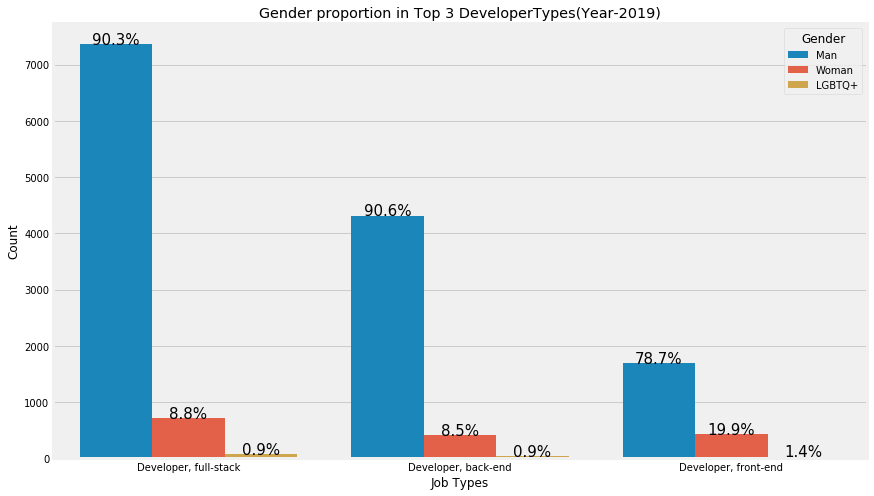

In [711]:
plt.figure(figsize=(13,8))
totals = job_gender['DevType'].value_counts()
ax = sns.countplot(x='DevType',hue='Gender',data=job_gender,order=totals.index,)
ax.set(xlabel='Job Types', ylabel='Count', title='Gender proportion in Top 3 DeveloperTypes(Year-2019)')

totals = job_gender['DevType'].value_counts()
n_hues = job_gender['Gender'].unique().size

temp_totals = totals.values.tolist()*n_hues
for p,t in zip(ax.patches,temp_totals):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{0:.1%}'.format(height/t),
        ha="center", fontsize=15)
    
plt.show()

**Observations**
-  According to above graph front-end developers have best gender proportion amongst developers community.

## 3. Popular Languages In Top 3 Developer Types in 2019

In [548]:
job_lang = survey_2019[["DevType","LanguageWorkedWith"]].dropna()

In [615]:
front_end = job_lang [(job_lang.DevType == "Developer, front-end")]
front_end_langs = pd.DataFrame(front_end["LanguageWorkedWith"].apply(lambda x: pd.value_counts(x.split(";")))
                             .count(axis = 0)).reset_index()
front_end_langs = front_end_langs.rename(columns= {0:"front_count" })

In [619]:
back_end = job_lang [(job_lang.DevType == "Developer, back-end")]
back_end_langs = pd.DataFrame(back_end["LanguageWorkedWith"].apply(lambda x: pd.value_counts(x.split(";")))
                             .count(axis = 0)).reset_index()
back_end_langs = back_end_langs.rename(columns= {0:"back_count" })

In [609]:
full_stack = job_lang [(job_lang.DevType == "Developer, full-stack")]
full_stack_langs = pd.DataFrame(full_stack["LanguageWorkedWith"].apply(lambda x: pd.value_counts(x.split(";")))
                             .count(axis = 0)).reset_index()
full_stack_langs = full_stack_langs.rename(columns= {0:"full_count" })

In [623]:
developers_all = pd.merge(front_end_langs[["index","front_count"]],back_end_langs[["index","back_count"]],
                on="index", how='left').merge(full_stack_langs[["index","full_count"]],
                on="index", how='left')

In [630]:
  #Get values for these languages
languages_list = ['SQL', 'JavaScript','Java', 'Python','C#','C++','HTML',"HTML/CSS"]
developers_langs  = developers_all[developers_all['index'].isin(languages_list)]

In [632]:
developers_langs["front_count_percent"] = round((developers_langs.front_count/sum(developers_langs.front_count))*100,2) 
developers_langs["back_count_percent"] = round((developers_langs.back_count/sum(developers_langs.back_count))*100,2)
developers_langs["full_count_percent"] = round((developers_langs.full_count/sum(developers_langs.full_count))*100,2) 

In [633]:
developers_langs

index  front_count  back_count  full_count  front_count_percent  \
2   JavaScript         2049        2421        7452                37.14   
3     HTML/CSS         1903        1820        6609                34.49   
4          SQL          478        2582        5349                 8.66   
6       Python          320        1778        2407                 5.80   
7         Java          352        2257        3088                 6.38   
8           C#          277        1044        3175                 5.02   
11         C++          138         784         922                 2.50   

    back_count_percent  full_count_percent  
2                19.08               25.69  
3                14.35               22.79  
4                20.35               18.44  
6                14.02                8.30  
7                17.79               10.65  
8                 8.23               10.95  
11                6.18                3.18

In [639]:
x =['JavaScript',"HTML/CSS", 'SQL', 'Python',"Java","C#","C++"]

fig = go.Figure(data=[
    go.Bar(name='Front-end', x=x, y=developers_langs["front_count_percent"]),
    go.Bar(name='Back-end',  x=x,  y=developers_langs["back_count_percent"]),
    go.Bar(name='Full-stack', x=x, y=developers_langs["full_count_percent"]),
    
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(
    title="POPULAR LANGUAGES IN DIFFERENT JOB TYPES",
    xaxis_title="Programming Languages",
    yaxis_title="Percentages")
fig.show()

**Notes:**
- There are around 29% of missing values in the DeveloperTypee column, which is just 1% less than the 30%, so will take this variable for our analysis. 
- For this analysis we are going to delete the rows with missing values of DeveloperType.

**Observations:**
- 1) Many of the respondents worked as more than 1 role , that is why the total count is more than the number of respondents.

- 2) I think there was change in the naming for some types of developers that is why there were no same types of developers recorded in 2018 and 2019.

- 3) According to above visualization full-stack, back-end and front-end developers were the top most developers roles in the 2019.  

# <a id='4.3'>4.3. GENDER </a> 

## 1. Gender proportion in development community from 2016 to 2019

In [569]:
def genders(dataset,column,new_name_col1,year):
    
    temp = pd.DataFrame(dataset[column].dropna())
    temp = pd.DataFrame(temp[column].apply(lambda x: pd.value_counts(x.split(";")))
                             .sum(axis = 0)).reset_index()
    new_name_col2 = ("Count"+str(year))
    
    '''
    dataset = dataset you want to use 
    col = On the column you want to use this function
    name_col1 = give new name to column one
    name_col2 = give new name to column two (Preferably count)
    '''
    #Renaming columns
    clean_data = temp.rename(columns={"index": new_name_col1,0:new_name_col2})
    clean_data["New_column"] = clean_data[new_name_col1].str.strip()
    clean_data = clean_data.drop(columns=[new_name_col1])
    clean_data = clean_data.sort_values(by=new_name_col2, ascending=False)
    clean_data["Count%"+str(year)] = clean_data[new_name_col2]/sum(clean_data[new_name_col2])
    
    #Grab DataFrame rows where column has certain values
    selected_rows = pd.DataFrame(clean_data.groupby(['New_column']).sum().sort_values(by=new_name_col2,
                                                                                         ascending = False)).reset_index()
 
    return selected_rows

In [570]:
genders_2016 = genders(survey_2016,"gender","Genders_all",2016)
genders_2016 

New_column  Count2016  Count%2016
0                    Male    51388.0    0.924477
1                  Female     3202.0    0.057604
2  Prefer not to disclose      722.0    0.012989
3                   Other      274.0    0.004929

In [571]:
genders_2016 = genders_2016.replace(["Gender non-conforming","Transgender","Other","Prefer not to disclose"],"LGBTQ+")

In [572]:
genders_2017 = genders(survey_2017,"Gender","Genders_all",2017)
genders_2017 

New_column  Count2017  Count%2017
0                   Male    31890.0    0.896920
1                 Female     2743.0    0.077148
2                  Other      428.0    0.012038
3  Gender non-conforming      314.0    0.008831
4            Transgender      180.0    0.005063

In [573]:
genders_2017 = genders_2017.replace(["Gender non-conforming","Transgender","Other"],"LGBTQ+")

In [574]:
genders_2018 = genders(survey_2018,"Gender","Genders_all",2018)
genders_2018

New_column  Count2018  Count%2018
0                                               Male    59785.0    0.916779
1                                             Female     4409.0    0.067610
2  Non-binary, genderqueer, or gender non-conforming      595.0    0.009124
3                                        Transgender      423.0    0.006487

In [575]:
genders_2018 = genders_2018.replace(["Non-binary, genderqueer, or gender non-conforming","Transgender","Other"],
                                    "LGBTQ+")

In [576]:
genders_2019 = genders(survey_2019,"Gender","Genders_all",2019)
genders_2019

New_column  Count2019  Count%2019
0                                                Man    78302.0    0.910256
1                                              Woman     6709.0    0.077992
2  Non-binary, genderqueer, or gender non-conforming     1011.0    0.011753

In [577]:
genders_2019 = genders_2019.replace(["Non-binary, genderqueer, or gender non-conforming","Transgender","Other"],"LGBTQ+")
genders_2019 = genders_2019.replace(["Man","Woman"],["Male","Female"])

In [578]:
# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'},{'type':'domain'},{'type':'domain'}]]
fig = make_subplots(rows=1, cols=4, specs=specs, subplot_titles=('2016','2017','2018','2019'))


fig.add_trace(go.Pie(labels=genders_2017.New_column,values= genders_2016.Count2016,
             name='Top 10 Computer Programming Languages in 2017'),1,1)

fig.add_trace(go.Pie(labels=genders_2017.New_column,values= genders_2017.Count2017,
             name='Top 10 Computer Programming Languages in 2017'),1,2)

fig.add_trace(go.Pie(labels=genders_2018.New_column,values= genders_2018.Count2018,  
             name= 'Top 10 Computer Programming Languages in 2018'),1,3)

fig.add_trace(go.Pie(labels=genders_2019.New_column,values= genders_2019.Count2019,  
             name= 'Top 10 Computer Programming Languages in 2019'),1,4)


fig.update_traces(textinfo='label+percent')
fig.update_layout(title_text="Gender proportion in 2016, 2017, 2018 and 2019")

fig.show()

**Notes:**

- In 2019 we changed name of entries from "Man" to "Male and from "Woman" to "Female" for this comparative analysis. 

**Observations:** 

- As we can see from the above graphs that more than 90% developers are male and around 8% are females.